In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
from sklearn import datasets

In [3]:
?datasets

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target


In [6]:
len(X)

150

In [7]:
len(y)

150

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42)

In [10]:
X_train.shape

(120, 4)

In [11]:
X_test.shape

(30, 4)

In [12]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [13]:
parameters = {'max_depth': 3,
             'eta': 0.3,
             'silent': 1,
             'num_class':3}

In [14]:
num_round = 20

In [15]:
boost = xgb.train(parameters, dtrain, num_boost_round=num_round)

[14:00:56] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [16]:
preds = boost.predict(dtest)

In [17]:
len(preds)

30

In [18]:
preds[:10]

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1.], dtype=float32)

In [19]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [20]:
from sklearn.metrics import precision_score

In [21]:
precision_score(y_test, preds, average='macro')

1.0

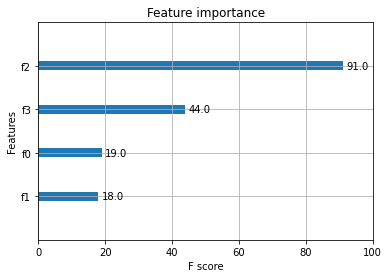

In [22]:
xgb.plot_importance(boost);

In [23]:
dtrain.feature_names

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']